https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned

Tikslai:
1. Rasti dazniausias markes skelbimuose;
2. Rasti brangiausiu autombiliu markes;
3. Palyginti automobiliu kainas pagal pagaminimo metus;
2. Palyginti automobiliu kainas pagal kebulo tipa;



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [3]:
aut = 'autos_random_50k_cleaned.csv' # failo pavadinimas
aut_f = pd.read_csv(aut)  #pandas nuskaito faila
aut_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37866 entries, 0 to 37865
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          37866 non-null  int64 
 1   date_crawled        37866 non-null  object
 2   car_name            37866 non-null  object
 3   price_EUR           37866 non-null  int64 
 4   ab_test             37866 non-null  object
 5   vehicle_type        37866 non-null  object
 6   registration_year   37866 non-null  int64 
 7   transmission        37866 non-null  object
 8   power_ps            37866 non-null  int64 
 9   model               37866 non-null  object
 10  odometer_km         37866 non-null  int64 
 11  registration_month  37866 non-null  int64 
 12  fuel_type           37866 non-null  object
 13  brand               37866 non-null  object
 14  unrepaired_damage   37866 non-null  object
 15  ad_created          37866 non-null  object
 16  postal_code         37

In [4]:
aut_f['AD_DATA'] = pd.to_datetime(aut_f['ad_created'])
aut_f.head(2)

,Unnamed: 0,date_crawled,car_name,price_EUR,ab_test,vehicle_type,registration_year,transmission,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,AD_DATA
0,1,2016-04-02 14:51,Astra_G_Cabrio_Turbo_235_PS,5200,test,cabrio,2002,manuell,235,astra,125000,5,Unknown,opel,nein,2016-04-02 0:00,47652,2016-04-06 13:17,2016-04-02
1,2,2016-03-19 18:36,Fiat_Grande_Punto_1.2_8V__MIT_2_JAHREN_GARANTIE,3400,test,kleinwagen,2006,manuell,65,andere,125000,5,benzin,fiat,nein,2016-03-19 0:00,66538,2016-04-07 7:15,2016-03-19


In [ ]:
aut_fg = aut_f[(aut_f['unrepaired_damage'] == 'nein')] # 30882 eiluciu nepazeistu automobiliu
aut_Y = aut_fg['registration_year']
aut_P = aut_fg['price_EUR']
aut_P1 = aut_fg[(aut_fg['registration_year'] > 2010)]
aut_P2 = aut_fg[(aut_fg['registration_year'].between(2001, 2010, inclusive=True))]
aut_P3 = aut_fg[(aut_fg['registration_year'].between(1991, 2000, inclusive=True))]
aut_P4 = aut_fg[(aut_fg['registration_year'].between(1981, 1990, inclusive=True))]
aut_P5 = aut_fg[(aut_fg['registration_year'].between(1971, 1980, inclusive=True))]
aut_P6 = aut_fg[(aut_fg['registration_year'].between(1961, 1970, inclusive=True))]
aut_P7 = aut_fg[(aut_fg['registration_year'].between(1951, 1960, inclusive=True))]
aut_P8 = aut_fg[(aut_fg['registration_year'].between(1941, 1950, inclusive=True))]
aut_P9 = aut_fg[(aut_fg['registration_year'].between(1930, 1940, inclusive=True))]





In [6]:
print(aut_fg['registration_year'].describe())
print(aut_fg['price_EUR'].describe())

count    30882.000000
mean      2003.871025
std          6.629659
min       1930.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64
count     30882.000000
mean       7539.126255
std       12536.780639
min         500.000000
25%        1999.000000
50%        4500.000000
75%        9500.000000
max      820000.000000
Name: price_EUR, dtype: float64


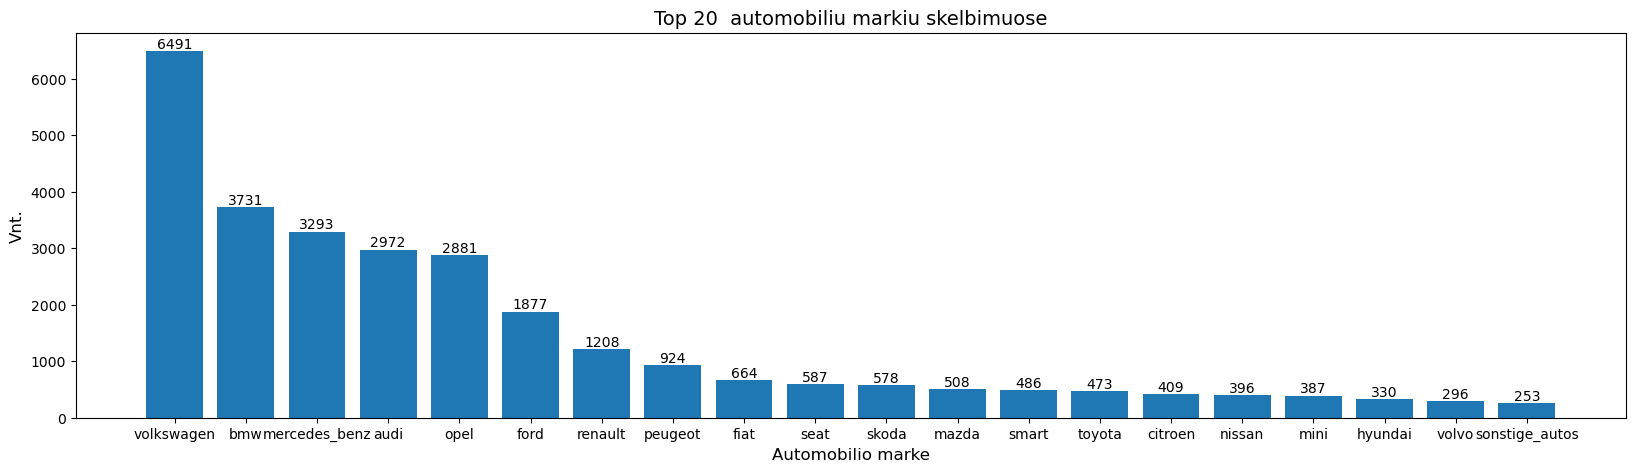

In [13]:

auto_unique = aut_fg['brand'].value_counts()

a = auto_unique.index[0:20]
b = auto_unique.values[0:20]

fig, ax = plt.subplots(figsize=(20, 5))
c = ax.bar(a, b)
ax.bar_label(c)

ax.set_ylabel('Vnt.', fontsize=12)
ax.set_xlabel('Automobilio marke', fontsize=12)
ax.set_title('Top 20  automobiliu markiu skelbimuose', fontsize=14)

plt.show()


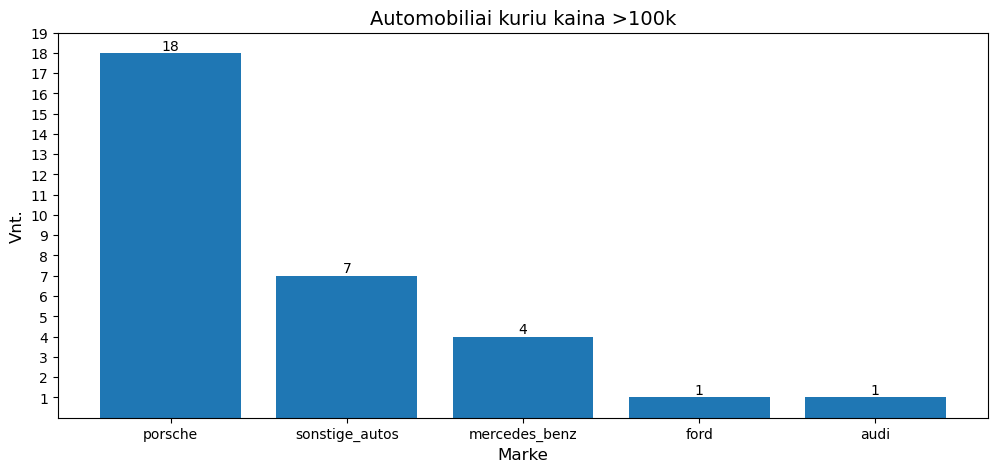

In [20]:
aut_expensive = aut_fg[(aut_fg['price_EUR'] > 100000)]
aut_expensive1 = aut_expensive['brand'].value_counts()
z = np.arange(1,20)
c = aut_expensive1.index
d = aut_expensive1.values

fig, ax = plt.subplots(figsize=(12, 5))
s = ax.bar(c, d)
ax.bar_label(s)

ax.set_ylabel('Vnt.', fontsize=12)
ax.set_xlabel('Marke', fontsize=12)
ax.set_title('Automobiliai kuriu kaina >100k', fontsize=14)
ax.set_yticks(z)


plt.show()


[14500  7990 14999 ... 34750 25900 12500]


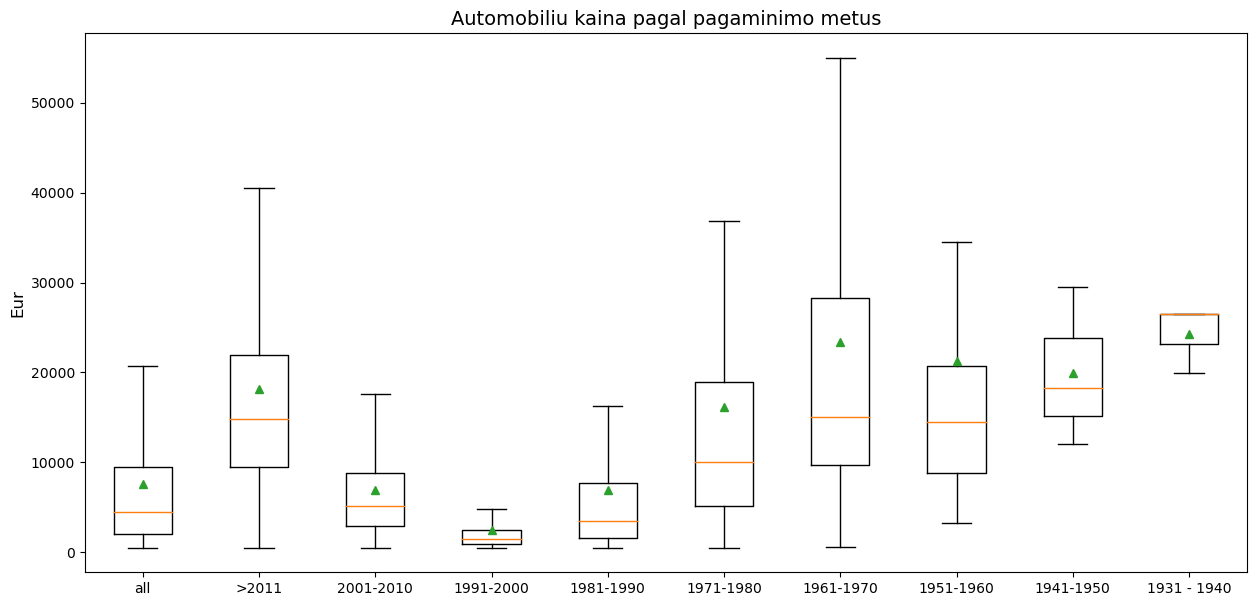

In [15]:
aut_P11 = aut_P1['price_EUR'].values
aut_P22 = aut_P2['price_EUR'].values
aut_P33 = aut_P3['price_EUR'].values
aut_P44 = aut_P4['price_EUR'].values
aut_P55 = aut_P5['price_EUR'].values
aut_P66 = aut_P6['price_EUR'].values
aut_P77 = aut_P7['price_EUR'].values
aut_P88 = aut_P8['price_EUR'].values
aut_P99 = aut_P9['price_EUR'].values


a = [aut_P, aut_P11, aut_P22, aut_P33, aut_P44, aut_P55, aut_P66, aut_P77, aut_P88, aut_P99]

fig, ax = plt.subplots(figsize=(15,7))
ax.boxplot(a, showmeans=True, showfliers=False)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ])
ax.set_xticklabels(['all', '>2011','2001-2010', '1991-2000','1981-1990', '1971-1980', '1961-1970', '1951-1960', '1941-1950', '1931 - 1940'])

ax.set_ylabel('Eur', fontsize=12)
ax.set_title('Automobiliu kaina pagal pagaminimo metus', fontsize=14)
plt.show()

In [14]:
aut_fg_vw = aut_fg[(aut_fg['brand'] == 'volkswagen')]
aut_fg_vwY = aut_fg_vw.groupby('registration_year')

Yearvw = aut_fg_vwY.groups.keys()
Pricevw = []
for key in aut_fg_vwY.groups.keys():
    L = round(aut_fg_vwY.get_group(key)['price_EUR'].values.mean(), 1)
    Pricevw.append(L)

aut_fg_bmw = aut_fg[(aut_fg['brand'] == 'bmw')]
aut_fg_bmwY = aut_fg_bmw.groupby('registration_year')

Yearbmw = aut_fg_bmwY.groups.keys()
Pricebmw = []
for key in aut_fg_bmwY.groups.keys():
    L = round(aut_fg_bmwY.get_group(key)['price_EUR'].values.mean(), 1)
    Pricebmw.append(L)

aut_fg_audi = aut_fg[(aut_fg['brand'] == 'audi')]
aut_fg_audiY = aut_fg_audi.groupby('registration_year')

Yearaudi = aut_fg_audiY.groups.keys()
Priceaudi = []
for key in aut_fg_audiY.groups.keys():
    L = round(aut_fg_audiY.get_group(key)['price_EUR'].values.mean(), 1)
    Priceaudi.append(L)

aut_fg_ford = aut_fg[(aut_fg['brand'] == 'ford')]
aut_fg_fordY = aut_fg_ford.groupby('registration_year')

Yearford = aut_fg_fordY.groups.keys()
Priceford = []
for key in aut_fg_fordY.groups.keys():
    L = round(aut_fg_fordY.get_group(key)['price_EUR'].values.mean(), 1)
    Priceford.append(L)

aut_fg_opel = aut_fg[(aut_fg['brand'] == 'opel')]
aut_fg_opelY = aut_fg_opel.groupby('registration_year')

Yearopel = aut_fg_opelY.groups.keys()
Priceopel = []
for key in aut_fg_opelY.groups.keys():
    L = round(aut_fg_opelY.get_group(key)['price_EUR'].values.mean(), 1)
    Priceopel.append(L)
    
aut_fg_mb = aut_fg[(aut_fg['brand'] == 'mercedes_benz')]
aut_fg_mbY = aut_fg_mb.groupby('registration_year')

Yearmb = aut_fg_mbY.groups.keys()
Pricemb = []
for key in aut_fg_mbY.groups.keys():
    L = round(aut_fg_mbY.get_group(key)['price_EUR'].values.mean(), 1)
    Pricemb.append(L)

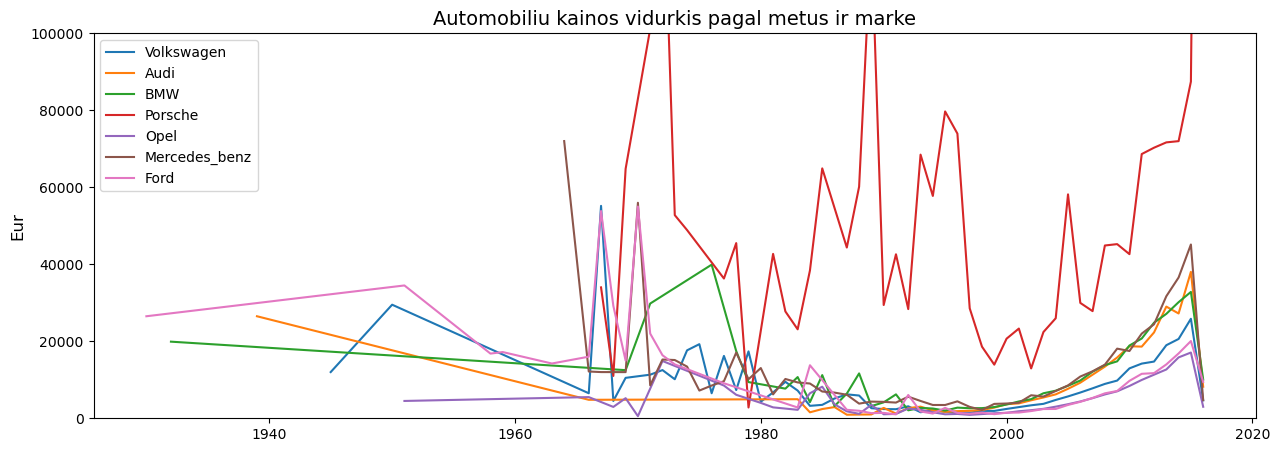

In [29]:
aut_fg_por = aut_fg[(aut_fg['brand'] == 'porsche')]
aut_fg_porY = aut_fg_por.groupby('registration_year')

Yearbpor = aut_fg_porY.groups.keys()
Pricepor = []
for key in aut_fg_porY.groups.keys():
    L = round(aut_fg_porY.get_group(key)['price_EUR'].values.mean(), 1)
    Pricepor.append(L)


fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Yearvw, Pricevw, label="Volkswagen")
ax.plot(Yearaudi, Priceaudi, label='Audi')
ax.plot(Yearbmw, Pricebmw, label="BMW")
ax.plot(Yearbpor, Pricepor, label = 'Porsche')
ax.plot(Yearopel, Priceopel, label = 'Opel')
ax.plot(Yearmb, Pricemb, label = 'Mercedes_benz')
ax.plot(Yearford, Priceford, label = 'Ford')
# ax.bar_label(c)

ax.set_ylabel('Eur', fontsize=12)
ax.set_title('Automobiliu kainos vidurkis pagal metus ir marke', fontsize=14) # pavadinimus sukelti
ax.set_ylim(0,100000)
ax.legend(loc=2)
plt.show()

    

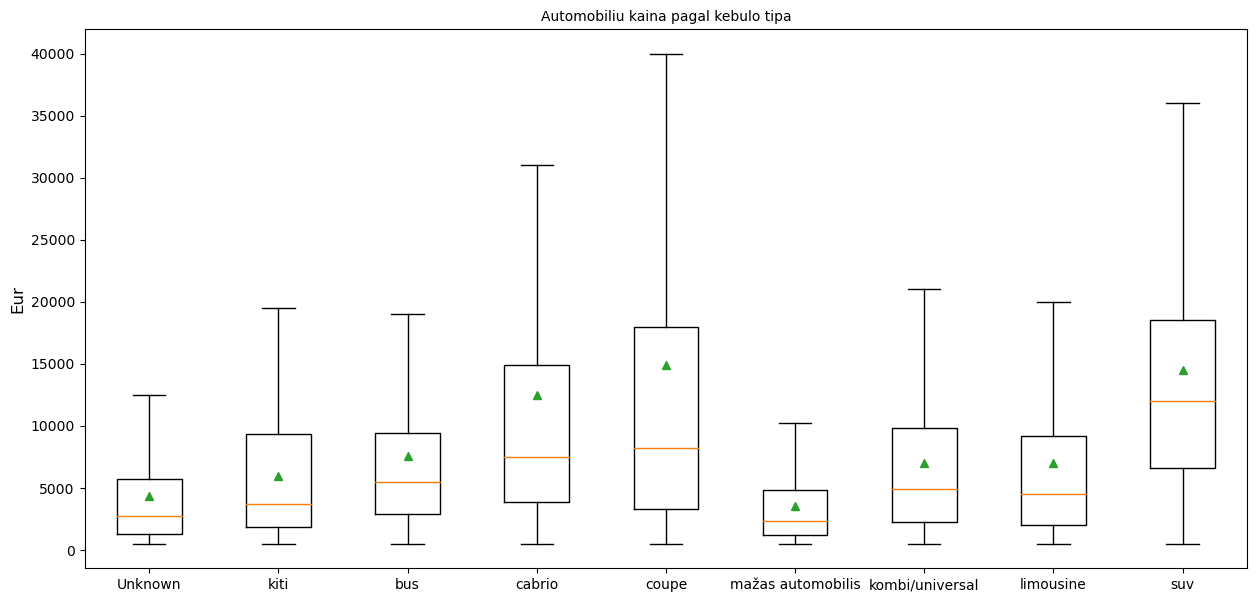

In [23]:

aut_fg_vT = aut_fg.groupby('vehicle_type')
VT = aut_fg_vT.groups.keys()
# print(VT)

def group(x):
    x = aut_fg_vT.get_group(x)['price_EUR'].values
    return x

cabrio = group('cabrio')
Unknown = group('Unknown')
bus = group('bus')
andere = group('andere')
coupe = group('coupe')
kleinwagen = group('kleinwagen')
kombi = group('kombi')
limousine = group('limousine')
suv = group('suv')

a = [Unknown, andere, bus, cabrio, coupe, kleinwagen, kombi, limousine, suv]

fig, ax = plt.subplots(figsize=(15,7))
ax.boxplot(a, showmeans=True, showfliers=False)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9 ])
ax.set_xticklabels(['Unknown', 'kiti', 'bus', 'cabrio', 'coupe', 'kompaktiski', 'kombi/universal', 'limousine', 'suv'])

ax.set_ylabel('Eur', fontsize=12)
ax.set_title('Automobiliu kaina pagal kebulo tipa', fontsize=10)
plt.show()